In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [94]:
# Carregar o dataset

df_casa = pd.read_csv("datasets/kc_house_data.csv")

In [95]:
df_casa.drop(["id", "date", "sqft_above","sqft_basement", "yr_built", "yr_renovated",	"zipcode",	"lat", "long",	"sqft_living15",	"sqft_lot15", "waterfront", "view", "condition", "grade"], axis=1, inplace=True)

In [96]:
df_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   sqft_lot     21613 non-null  int64  
 5   floors       21613 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1013.2 KB


In [97]:
df_casa.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000


In [98]:
df_casa.columns = ["preco", "banheiros", "quartos", "areaHabitavel", "tamanhoTerreno", "andares"]

## AED

<Axes: ylabel='preco'>

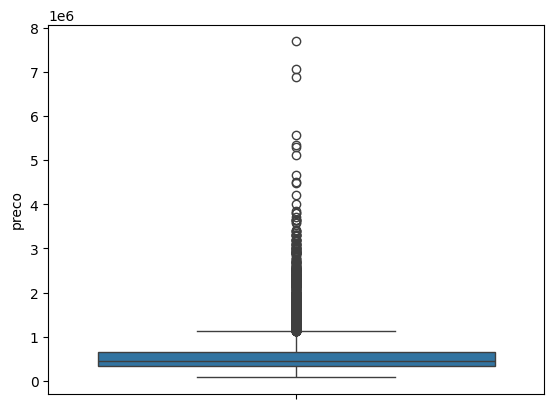

In [99]:
# Verificação de outliers

sns.boxplot(df_casa, y="preco")

<Axes: ylabel='banheiros'>

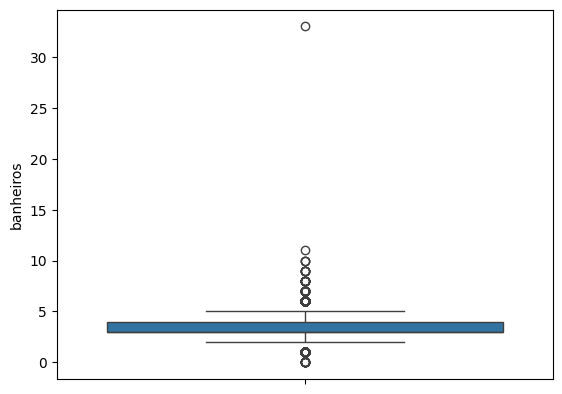

In [100]:
sns.boxplot(df_casa, y="banheiros")

<Axes: ylabel='quartos'>

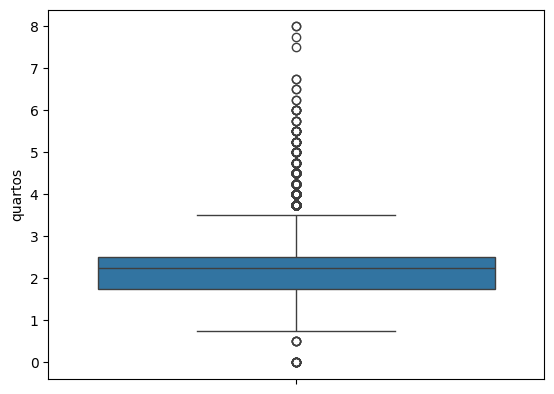

In [101]:
sns.boxplot(df_casa, y="quartos")

<Axes: ylabel='areaHabitavel'>

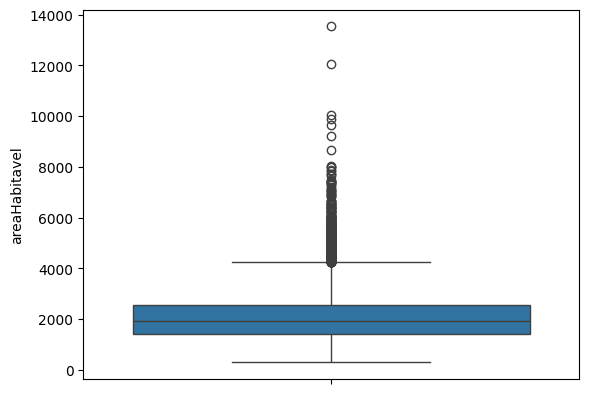

In [102]:
sns.boxplot(df_casa, y="areaHabitavel")

<Axes: ylabel='tamanhoTerreno'>

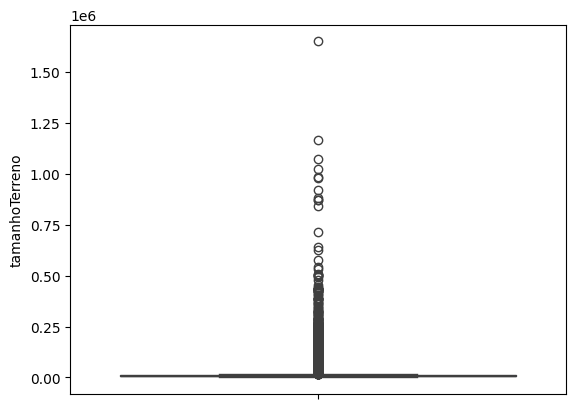

In [103]:
sns.boxplot(df_casa, y="tamanhoTerreno")


<Axes: ylabel='andares'>

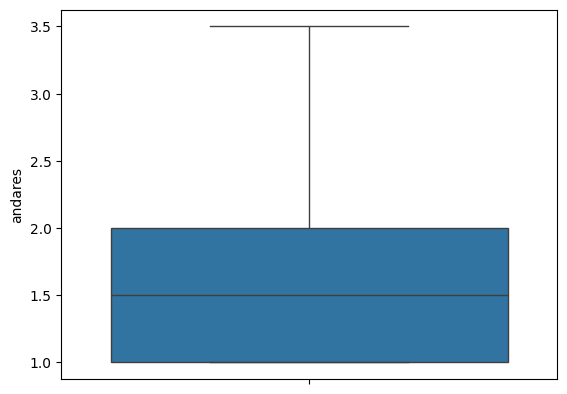

In [104]:
sns.boxplot(df_casa, y="andares")

In [105]:
# Transformação de variáveis de decimais para inteiros
df_casa.quartos = df_casa.quartos.astype(int)
df_casa.andares = df_casa.andares.astype(int)

In [106]:
# Estabelecimento do quartis para a exclusão de outliers

Q1_preco = df_casa.preco.quantile(0.25)
Q3_preco = df_casa.preco.quantile(0.75)

limiteSuperior_preco = Q3_preco + 1.5*(Q3_preco-Q1_preco)
Q1_terreno = df_casa.tamanhoTerreno.quantile(0.25)
Q3_terreno = df_casa.tamanhoTerreno.quantile(0.75)

limiteSuperior_terreno = Q3_terreno + 1.5*(Q3_terreno-Q1_terreno)
limiteSuperior_terreno

np.float64(19160.0)

In [107]:
# Exclusão de prováveis outliers
df_casa.drop(df_casa[(df_casa.preco > limiteSuperior_preco)].index, inplace=True)
df_casa.drop(df_casa[(df_casa.tamanhoTerreno > 15000)].index, inplace=True)
df_casa.drop(df_casa[(df_casa.banheiros > 6) | (df_casa.banheiros < 2)].index, inplace=True)
df_casa.drop(df_casa[(df_casa.banheiros == 6) & (df_casa.quartos <3)].index, inplace=True)
df_casa.drop(df_casa[(df_casa.preco > 6.430000e+05) & (df_casa.quartos <2) & (df_casa.areaHabitavel < 2550.000000)].index, inplace=True)
df_casa.drop(df_casa[(df_casa.preco > 6.430000e+05) & (df_casa.areaHabitavel < 1920.000000) &(df_casa.quartos <4)].index, inplace=True)
df_casa.drop(df_casa[(df_casa.areaHabitavel > 4000.000000)].index, inplace=True)


<Axes: xlabel='preco', ylabel='areaHabitavel'>

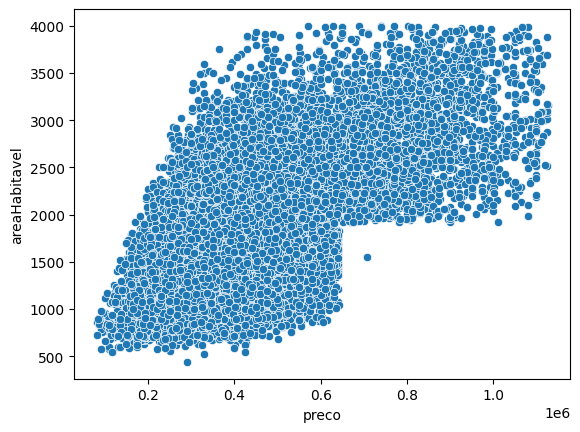

In [108]:
# Cruzamento de variáveis numéricas

sns.scatterplot(df_casa, x="preco", y="areaHabitavel")

<Axes: xlabel='preco', ylabel='tamanhoTerreno'>

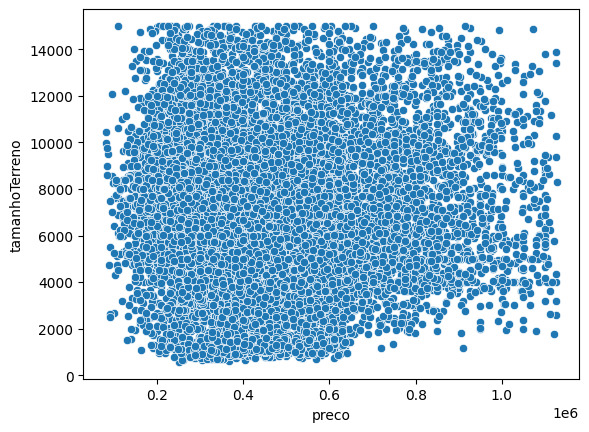

In [109]:
sns.scatterplot(df_casa, x="preco", y="tamanhoTerreno")

<Axes: xlabel='andares', ylabel='preco'>

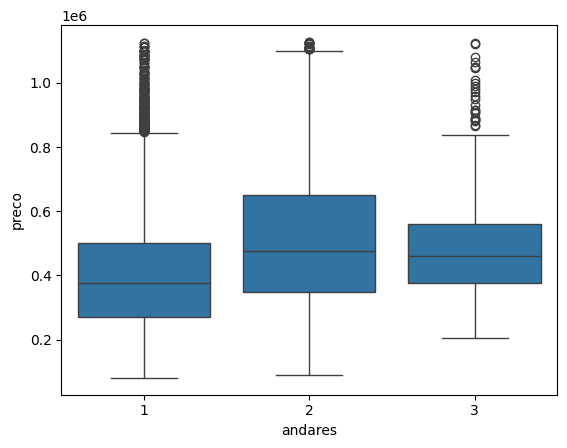

In [110]:
sns.boxplot(df_casa, y="preco", x="andares")

<Axes: xlabel='banheiros', ylabel='preco'>

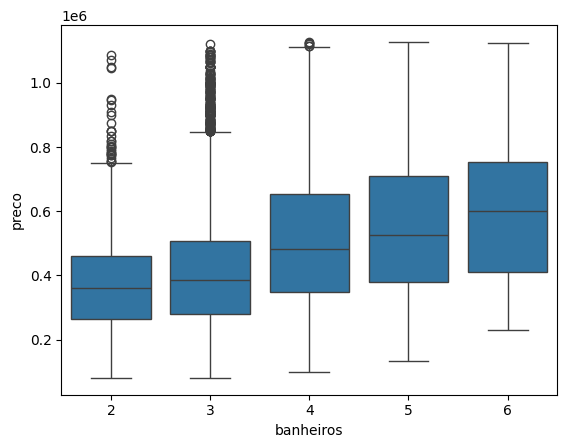

In [111]:
sns.boxplot(df_casa, y="preco", x="banheiros")

<Axes: xlabel='quartos', ylabel='preco'>

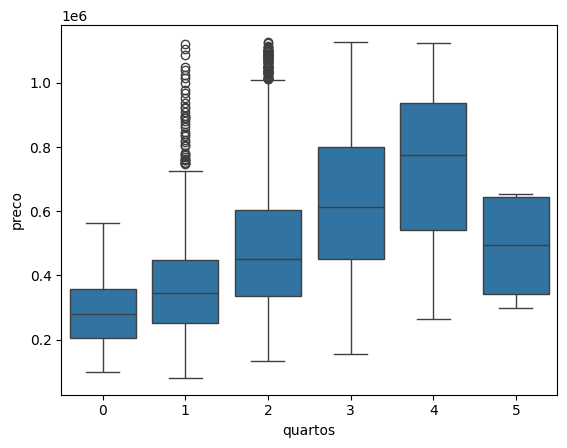

In [112]:
sns.boxplot(df_casa, y="preco", x="quartos")

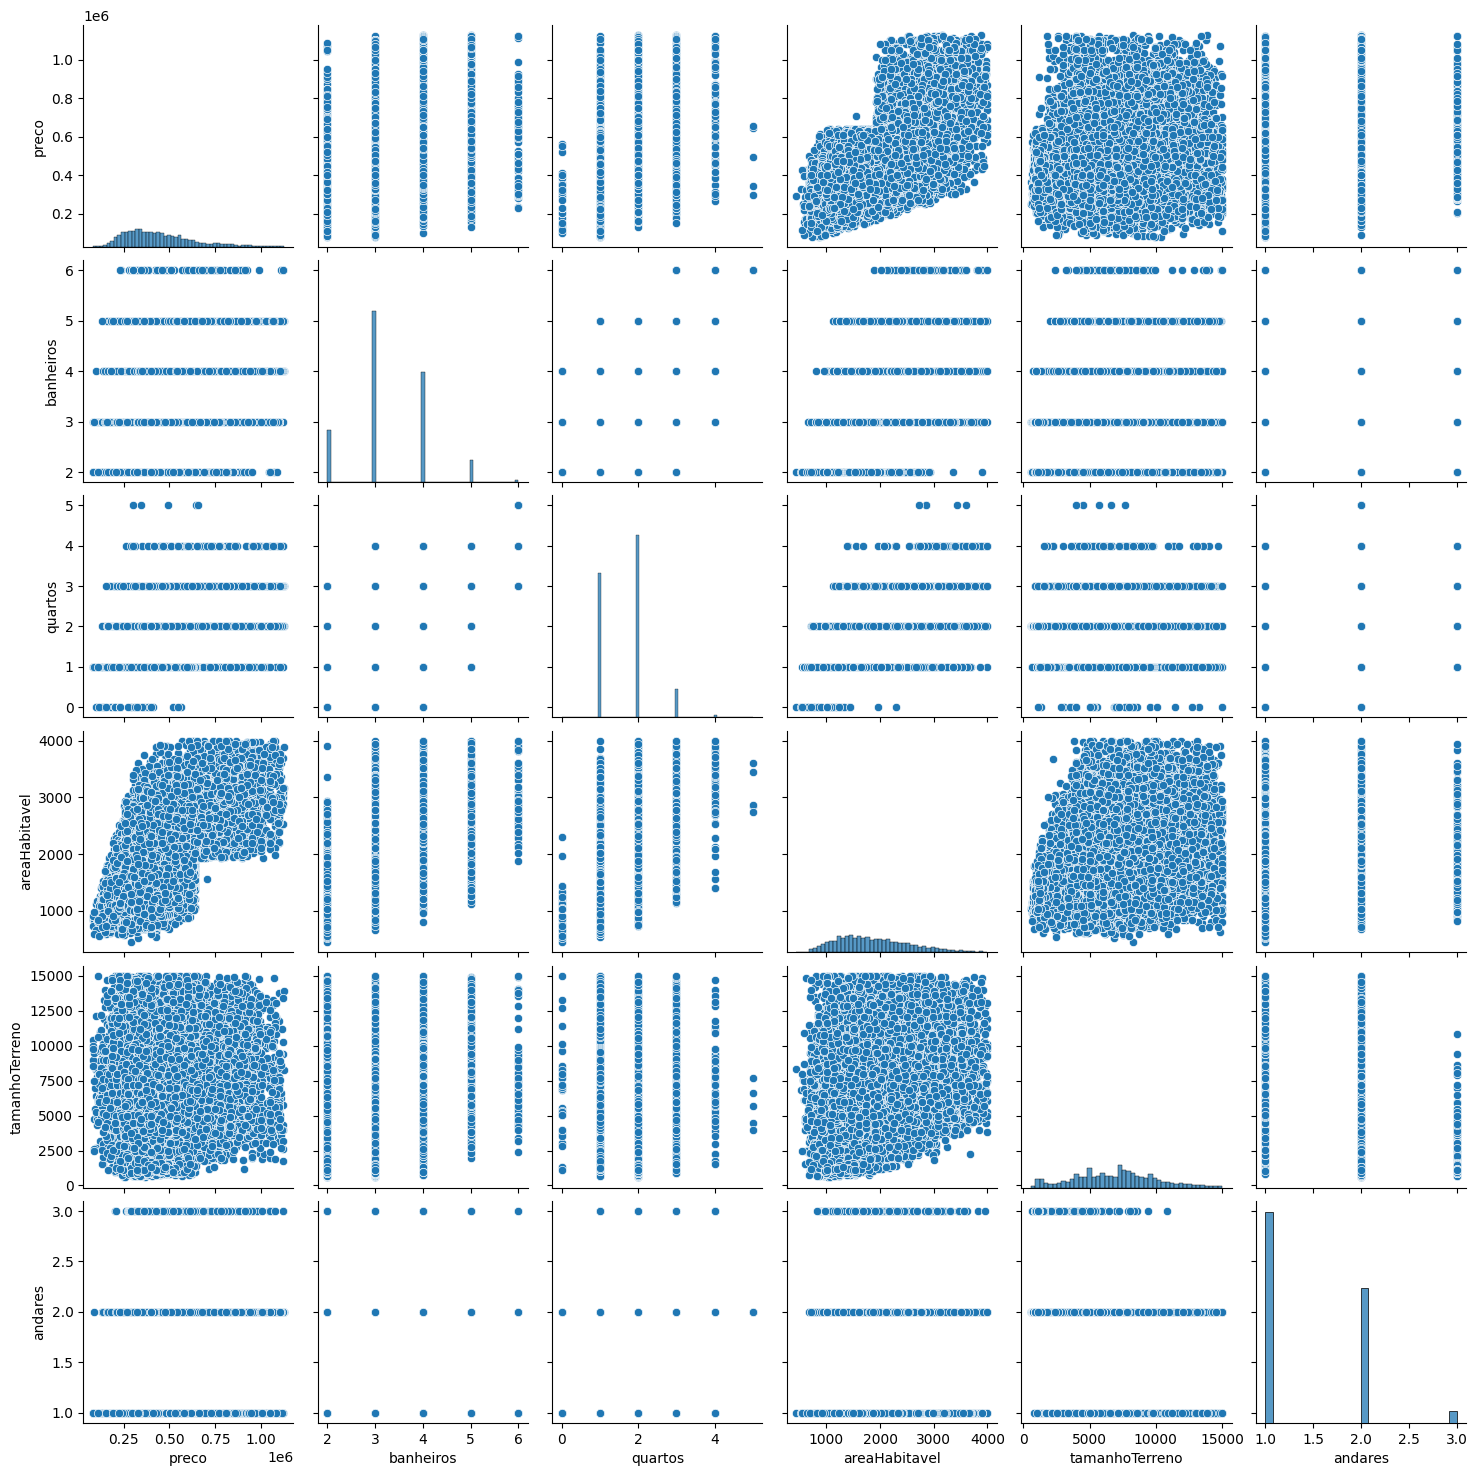

In [113]:
sns.pairplot(df_casa)

## Analise de correlação

<Axes: >

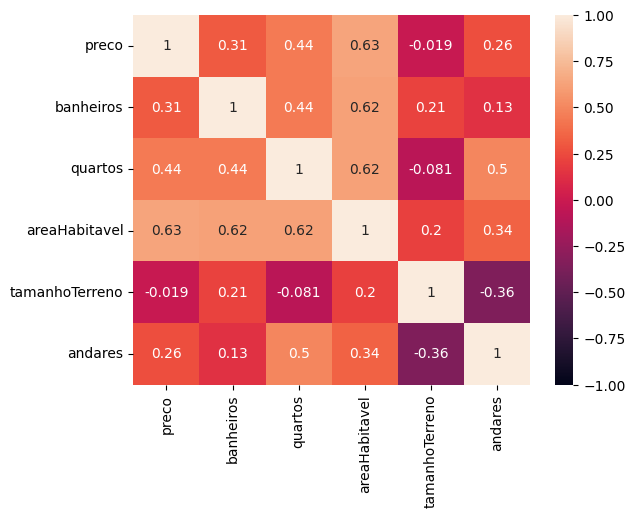

In [114]:
sns.heatmap(df_casa.corr(), vmin=-1, vmax=1, annot=True)

## Treinamento de modelo linear 

In [115]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error, r2_score

import numpy as np

In [116]:
# Criar um Dataset de treino e teste

X = df_casa.drop("preco", axis=1)
y = df_casa["preco"]

In [117]:
# Split usando KFold com 5 splits

kf = KFold(n_splits=5, shuffle=True, random_state=51)
kf.split(X)

<generator object _BaseKFold.split at 0x0000028FDDF82790>

In [118]:
# Pipeline
# Padronizar variáveis numéricas

# Nomes das colunas
colunas_numericas = ['banheiros', 'quartos', 'andares', 'areaHabitavel', 'tamanhoTerreno']

# Transfornmer para colunas numericas
# A transformação realizada pelo StandardScaler é linear, ou seja, ela apenas "redimensiona" os dados sem alterar a relação entre eles
transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Criar um ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer, colunas_numericas)
    ]
)

# Criando o Pipeline principal = Pré-processamento + Treinamento
model_poly = Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())])

rmse_scores_fold_train = []
rmse_scores_fold_test = []
r2score_fold_test = []
residuos = []
y_pred_total = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Treina o modelo no conjunto de treinamento
    model_poly.fit(X_train, y_train)
    
    # Faça predições nos conjuntos de treinamento e teste
    y_train_pred = model_poly.predict(X_train)
    y_test_pred = model_poly.predict(X_test)
    
    #Calculo do RMSE, R2 e residuos
    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)
    r2score_test = r2_score(y_test, y_test_pred)
    residuos_test = np.array(y_test_pred-y_test_pred)
    
    rmse_scores_fold_train.append(rmse_train)
    rmse_scores_fold_test.append(rmse_test)
    r2score_fold_test.append(r2score_test)
    residuos.append(residuos_test)
    y_pred_total.append(y_test_pred)
    
rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)
r2score_test_final = np.mean(r2score_fold_test)
percentual_rmse_final = ((rmse_test_final - rmse_train_final)/ rmse_train_final)*100 
residuos = np.concatenate(residuos)
y_pred_total = np.concatenate(y_pred_total)

In [119]:
# Resultados

print(f"RMSE treino: {rmse_train_final}")
print(f"RMSE teste: {rmse_test_final}")
print(f"R2: {r2score_test_final}")
print(f"Percentual do RMSE: {percentual_rmse_final}")

RMSE treino: 145065.9604960536
RMSE teste: 145116.74587912433
R2: 0.435688616012194
Percentual do RMSE: 0.03500847676261954


##  Treinar modelo polinomial

In [120]:
feat_poly = PolynomialFeatures(degree = 2, include_bias=True)
X_poly = feat_poly.fit_transform(X)
feat_poly.feature_names_in_

array(['banheiros', 'quartos', 'areaHabitavel', 'tamanhoTerreno',
       'andares'], dtype=object)

In [121]:
feat_poly.get_feature_names_out(feat_poly.feature_names_in_)

array(['1', 'banheiros', 'quartos', 'areaHabitavel', 'tamanhoTerreno',
       'andares', 'banheiros^2', 'banheiros quartos',
       'banheiros areaHabitavel', 'banheiros tamanhoTerreno',
       'banheiros andares', 'quartos^2', 'quartos areaHabitavel',
       'quartos tamanhoTerreno', 'quartos andares', 'areaHabitavel^2',
       'areaHabitavel tamanhoTerreno', 'areaHabitavel andares',
       'tamanhoTerreno^2', 'tamanhoTerreno andares', 'andares^2'],
      dtype=object)

In [122]:
# Split usando KFold com 5 splits



In [123]:
graus_polymonial = [1, 2, 3]

rmse_train_values = []
rmse_test_values = []
precentual_rmse_values = []
r2score_test_values = []

kf = KFold(n_splits=5, shuffle=True, random_state=51)
kf.split(X)
for grau in graus_polymonial:
    colunas_numericas = ['banheiros', 'quartos', 'andares', 'areaHabitavel', 'tamanhoTerreno']

   
    transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer, colunas_numericas)
    ]
    )

    #Criação das features polinomiais
    poly_feat = PolynomialFeatures(degree=grau, include_bias=False)

    model_poly = Pipeline([('preprocessor', preprocessor),('poly_features', poly_feat), ('regressor', LinearRegression())])

    rmse_scores_fold_train = []
    rmse_scores_fold_test = []
    r2score_fold_test = []
    residuos = []
    y_pred_total = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model_poly.fit(X_train, y_train)

        y_train_pred = model_poly.predict(X_train)
        y_test_pred = model_poly.predict(X_test)

        rmse_train = root_mean_squared_error(y_train, y_train_pred)
        rmse_test = root_mean_squared_error(y_test, y_test_pred)
        r2score_test = r2_score(y_test, y_test_pred)
        residuos_test = np.array(y_test-y_test_pred)

        rmse_scores_fold_train.append(rmse_train)
        rmse_scores_fold_test.append(rmse_test)
        r2score_fold_test.append(r2score_test)
        residuos.append(residuos_test)
        y_pred_total.append(y_test_pred)

    rmse_train_final = np.mean(rmse_scores_fold_train)
    rmse_test_final = np.mean(rmse_scores_fold_test)
    r2score_test_final = np.mean(r2score_fold_test)
    percentual_rmse_final = ((rmse_test_final - rmse_train_final)/ rmse_train_final)*100 
    residuos = np.concatenate(residuos)
    y_pred_total = np.concatenate(y_pred_total)

    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_test_final)
    r2score_test_values.append(r2score_test_final)
    precentual_rmse_values.append(percentual_rmse_final)
    residuos

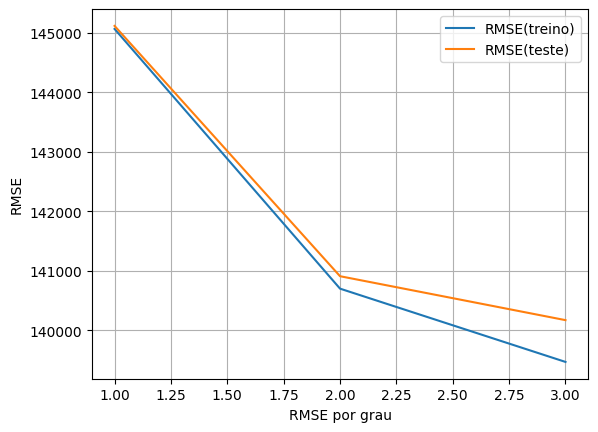

In [129]:
plt.plot(graus_polymonial, rmse_train_values, label ="RMSE(treino)")
plt.plot(graus_polymonial, rmse_test_values, label ="RMSE(teste)")
plt.xlabel("Grau do Polinomio")
plt.ylabel("RMSE")
plt.xlabel("RMSE por grau")
plt.legend()
plt.grid(True)
plt.show()

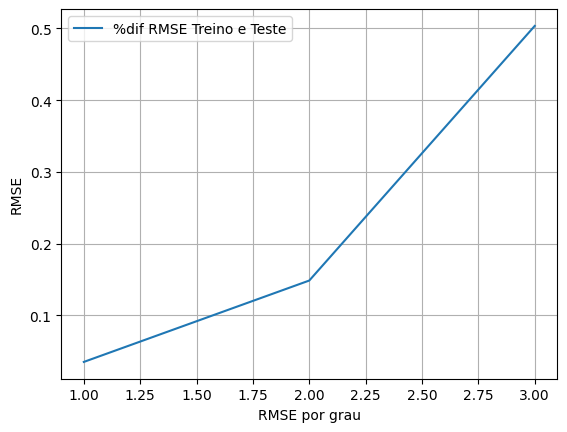

In [125]:
plt.plot(graus_polymonial, precentual_rmse_values, label="%dif RMSE Treino e Teste")
plt.xlabel("Grau do Polinomio")
plt.ylabel("RMSE")
plt.xlabel("RMSE por grau")
plt.legend()
plt.grid(True)
plt.show()


### Análise de residuos e métricas

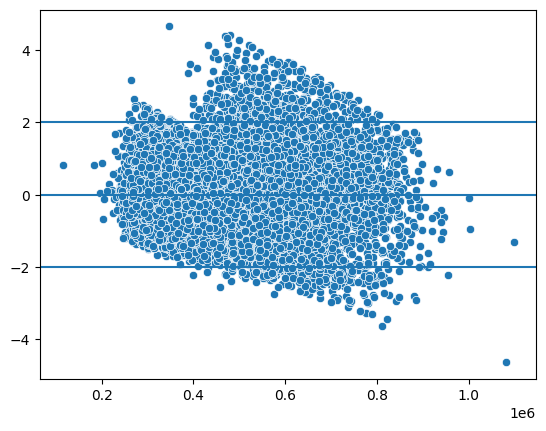

In [126]:
from scipy.stats import zscore
residuos_std = zscore(residuos)
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=2)
plt.axhline(y=-2)


In [127]:
# Resultados
print(f"RMSE treino: {rmse_train_final}")
print(f"RMSE teste: {rmse_test_final}")
print(f"R2: {r2score_test_final}")
print(f"Percentual do RMSE: {percentual_rmse_final}")

RMSE treino: 139469.64986582065
RMSE teste: 140171.97501721606
R2: 0.4735001788644328
Percentual do RMSE: 0.5035684480968345


<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

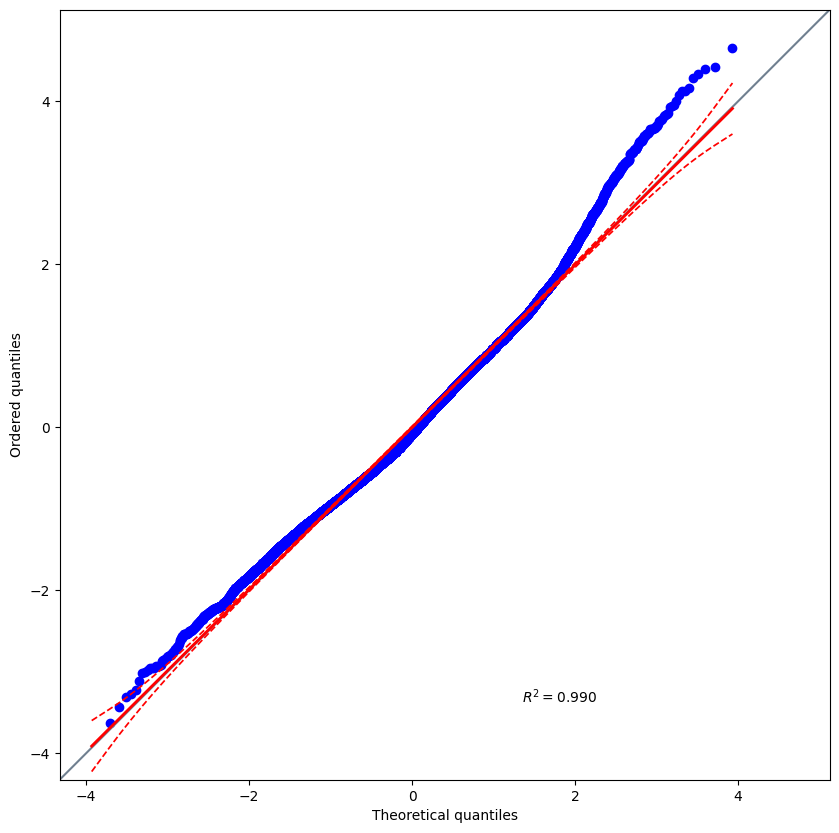

In [128]:
import pingouin as pg

plt.figure(figsize=(10, 10))

pg.qqplot(residuos_std, dist='norm',confidence=0.8)

In [131]:
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors

stats_shapiro, p_value_shapiro  = shapiro(residuos)
print(stats_shapiro, p_value_shapiro)

0.9895613477732399 1.1099097314820083e-32


c:\Users\55119\.virtualenvs\PoliHouseValueEstimator-ViXbURFe\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16380.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
stats_shapiro, p_value_shapiro  = shapiro(residuos)
print(stats_shapiro, p_value_shapiro)